Importar Librerias

In [48]:
!pip install wfdb
!pip install PeakUtils
!pip install cufflinks
!pip install --upgrade plotly
!pip install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn as skl
import scipy as sp
import seaborn as sns
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Obtener Dataset

In [49]:
url = 'https://raw.githubusercontent.com/jesusf65/Datos-ECG/main/DATOS%20IMPORTANTES%20RESONANCIA.xlsx%20-%20DATOS%20IMPORTANTES%20RESONANCIA%20(1%20(1).csv'
url2 = 'https://raw.githubusercontent.com/jesusf65/Datos-ECG/main/Diccionario%20FVL%20-%20Hoja%201%20(1).csv'

df = pd.read_csv(url)

df


,Fecha,Hora,Paciente,NumDcto,Fecha_naci.,Motivo_de_modificación,Fecha_anulación,Fecha_crea.,Fecha_mod.,Comentario,TipodeCita
0,3/10/2018,12:35:00,1000000,1,18/11/2010,NaN,1/10/2018,4/3/2015,1/10/2018,NaN,CANCELADA
1,11/12/2019,6:10:00,784266,1,21/7/1964,NaN,10/12/2019,14/11/2019,10/12/2019,NaN,CANCELADA
2,15/12/2019,11:00:00,784266,1,21/7/1964,CANCELADO,5/12/2019,5/12/2019,5/12/2019,NaN,CANCELADA
3,27/5/2020,11:55:00,784266,1,21/7/1964,NaN,26/5/2020,26/5/2020,26/5/2020,NaN,CANCELADA
4,23/4/2019,16:40:00,147851,226663,26/4/1963,NaN,22/4/2019,22/4/2019,22/4/2019,NaN,CANCELADA
...,...,...,...,...,...,...,...,...,...,...,...
29164,13/3/2019,7:20:00,818593,1107854633,29/11/2008,NaN,NaN,25/2/2019,13/3/2019,URORNM+C*ANESTESIA* OK VALORACION,ATENDIDA
29165,13/7/2020,7:20:00,722696,1109930535,11/7/2014,"NO HOSP, NO OXIG, NO AMB*NO ALERGIA LATEX*",NaN,9/6/2020,13/7/2020,URORNM+C*ANESTESIA*OK VALORACION,ATENDIDA
29166,24/6/2020,7:20:00,1299864,1113373144,15/6/2018,NaN,NaN,1/6/2020,24/6/2020,URORNM+C*ANESTESIA*VAL 19 JUNIO,ATENDIDA
29167,3/1/2020,9:40:00,11850,41494503,2/3/1950,NaN,NaN,13/12/2019,3/1/2020,URORNM+C*CR:0.59 TFG 107.4%*AYUNO 8H*SIN CONTR...,ATENDIDA


Filtrar Dataframe

In [50]:
#Filtro los datos que son de ejemplo en el DataFrame
df = df[(df["Paciente"]!="1000000")]
df = df[(df["NumDcto"]!="1")]

#Filtro las citas asignadas
df = df[(df["TipodeCita"]!="ASIGNADA")]

#Cambiamos los datos vacios con 0 de fecha de anulacion
df['Fecha_anulación'] = df['Fecha_anulación'].replace(np.nan,0)

#Dejamos todos los comentarios en mayúsculas
df['Comentario'] = df['Comentario'].str.upper()
df
#print(df)

,Fecha,Hora,Paciente,NumDcto,Fecha_naci.,Motivo_de_modificación,Fecha_anulación,Fecha_crea.,Fecha_mod.,Comentario,TipodeCita
4,23/4/2019,16:40:00,147851,226663,26/4/1963,NaN,22/4/2019,22/4/2019,22/4/2019,NaN,CANCELADA
5,5/1/2018,17:50:00,109307,14876223,9/9/1957,NaN,0,4/1/2018,5/1/2018,NaN,ATENDIDA
6,17/2/2019,15:30:00,567906,14893450,1/6/1970,NaN,11/2/2019,11/2/2019,11/2/2019,NaN,CANCELADA
7,12/1/2018,15:30:00,839132,14894263,7/5/1971,NaN,0,12/1/2018,12/1/2018,NaN,ATENDIDA
8,14/11/2018,9:05:00,100033,16251190,22/1/1953,NaN,0,13/11/2018,14/11/2018,NaN,ATENDIDA
...,...,...,...,...,...,...,...,...,...,...,...
29164,13/3/2019,7:20:00,818593,1107854633,29/11/2008,NaN,0,25/2/2019,13/3/2019,URORNM+C*ANESTESIA* OK VALORACION,ATENDIDA
29165,13/7/2020,7:20:00,722696,1109930535,11/7/2014,"NO HOSP, NO OXIG, NO AMB*NO ALERGIA LATEX*",0,9/6/2020,13/7/2020,URORNM+C*ANESTESIA*OK VALORACION,ATENDIDA
29166,24/6/2020,7:20:00,1299864,1113373144,15/6/2018,NaN,0,1/6/2020,24/6/2020,URORNM+C*ANESTESIA*VAL 19 JUNIO,ATENDIDA
29167,3/1/2020,9:40:00,11850,41494503,2/3/1950,NaN,0,13/12/2019,3/1/2020,URORNM+C*CR:0.59 TFG 107.4%*AYUNO 8H*SIN CONTR...,ATENDIDA


 Conversion de Hora a Float

In [51]:
#Convertimos la columna 'Hora' a objetos datetime
df['Hora'] = df['Hora'].astype(str)
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M:%S')

#Convertimos la hora a float
df['Hora'] = df['Hora'].dt.hour + (df['Hora'].dt.minute/100)
df['Hora'] = df['Hora'].astype(float)
df

,Fecha,Hora,Paciente,NumDcto,Fecha_naci.,Motivo_de_modificación,Fecha_anulación,Fecha_crea.,Fecha_mod.,Comentario,TipodeCita
4,23/4/2019,16.40,147851,226663,26/4/1963,NaN,22/4/2019,22/4/2019,22/4/2019,NaN,CANCELADA
5,5/1/2018,17.50,109307,14876223,9/9/1957,NaN,0,4/1/2018,5/1/2018,NaN,ATENDIDA
6,17/2/2019,15.30,567906,14893450,1/6/1970,NaN,11/2/2019,11/2/2019,11/2/2019,NaN,CANCELADA
7,12/1/2018,15.30,839132,14894263,7/5/1971,NaN,0,12/1/2018,12/1/2018,NaN,ATENDIDA
8,14/11/2018,9.05,100033,16251190,22/1/1953,NaN,0,13/11/2018,14/11/2018,NaN,ATENDIDA
...,...,...,...,...,...,...,...,...,...,...,...
29164,13/3/2019,7.20,818593,1107854633,29/11/2008,NaN,0,25/2/2019,13/3/2019,URORNM+C*ANESTESIA* OK VALORACION,ATENDIDA
29165,13/7/2020,7.20,722696,1109930535,11/7/2014,"NO HOSP, NO OXIG, NO AMB*NO ALERGIA LATEX*",0,9/6/2020,13/7/2020,URORNM+C*ANESTESIA*OK VALORACION,ATENDIDA
29166,24/6/2020,7.20,1299864,1113373144,15/6/2018,NaN,0,1/6/2020,24/6/2020,URORNM+C*ANESTESIA*VAL 19 JUNIO,ATENDIDA
29167,3/1/2020,9.40,11850,41494503,2/3/1950,NaN,0,13/12/2019,3/1/2020,URORNM+C*CR:0.59 TFG 107.4%*AYUNO 8H*SIN CONTR...,ATENDIDA


Calculo de la edad por paciente

In [46]:
import datetime

#Calculo de la edad a todos los pacientes
df['Fecha_naci.'] = pd.to_datetime(df['Fecha_naci.'])
df['Fecha_crea.']  = pd.to_datetime(df['Fecha_crea.'])
hoy = datetime.datetime.now()
df['Edad'] = ((df['Fecha_crea.']  - df['Fecha_naci.']) / 365).dt.days  
df.Edad[df.Edad<0] = 0
df

,Fecha,Hora,Paciente,NumDcto,Fecha_naci.,Motivo_de_modificación,Fecha_anulación,Fecha_crea.,Fecha_mod.,Comentario,TipodeCita,Edad,Dia_semana
4,2019-04-23,16.40,338070209,226663,1963-04-26,NaN,22/4/2019,2019-04-22,22/4/2019,NaN,CANCELADA,56,Martes
5,2018-05-01,17.50,308885273,14876223,1957-09-09,NaN,0,2018-04-01,5/1/2018,NaN,ATENDIDA,60,Martes
6,2019-02-17,15.30,611249856,14893450,1970-01-06,NaN,11/2/2019,2019-11-02,11/2/2019,NaN,CANCELADA,49,Domingo
7,2018-12-01,15.30,750557354,14894263,1971-07-05,NaN,0,2018-12-01,12/1/2018,NaN,ATENDIDA,47,Sabado
8,2018-11-14,9.05,317328736,16251190,1953-01-22,NaN,0,2018-11-13,14/11/2018,NaN,ATENDIDA,65,Miercoles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29164,2019-03-13,7.20,679521187,1107854633,2008-11-29,NaN,0,2019-02-25,13/3/2019,URORNM+C*ANESTESIA* OK VALORACION,ATENDIDA,10,Miercoles
29165,2020-07-13,7.20,593084942,1109930535,2014-11-07,"NO HOSP, NO OXIG, NO AMB*NO ALERGIA LATEX*",0,2020-09-06,13/7/2020,URORNM+C*ANESTESIA*OK VALORACION,ATENDIDA,5,Lunes
29166,2020-06-24,7.20,1115518710,1113373144,2018-06-15,NaN,0,2020-01-06,24/6/2020,URORNM+C*ANESTESIA*VAL 19 JUNIO,ATENDIDA,1,Miercoles
29167,2020-03-01,9.40,264141456,41494503,1950-02-03,NaN,0,2019-12-13,3/1/2020,URORNM+C*CR:0.59 TFG 107.4%*AYUNO 8H*SIN CONTR...,ATENDIDA,69,Domingo


Identificar día de la semana

In [52]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

# agrega una nueva columna con el día de la semana
df['Dia_semana'] = df['Fecha'].dt.weekday

df.Dia_semana = df.Dia_semana.replace(0,'Lunes')
df.Dia_semana = df.Dia_semana.replace(1,'Martes')
df.Dia_semana = df.Dia_semana.replace(2,'Miercoles')
df.Dia_semana = df.Dia_semana.replace(3,'Jueves')
df.Dia_semana = df.Dia_semana.replace(4,'Viernes')
df.Dia_semana = df.Dia_semana.replace(5,'Sabado')
df.Dia_semana = df.Dia_semana.replace(6,'Domingo')
df


<ipython-input-52-05f5433014e8>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,Fecha,Hora,Paciente,NumDcto,Fecha_naci.,Motivo_de_modificación,Fecha_anulación,Fecha_crea.,Fecha_mod.,Comentario,TipodeCita,Dia_semana
4,2019-04-23,16.40,147851,226663,26/4/1963,NaN,22/4/2019,22/4/2019,22/4/2019,NaN,CANCELADA,Martes
5,2018-05-01,17.50,109307,14876223,9/9/1957,NaN,0,4/1/2018,5/1/2018,NaN,ATENDIDA,Martes
6,2019-02-17,15.30,567906,14893450,1/6/1970,NaN,11/2/2019,11/2/2019,11/2/2019,NaN,CANCELADA,Domingo
7,2018-12-01,15.30,839132,14894263,7/5/1971,NaN,0,12/1/2018,12/1/2018,NaN,ATENDIDA,Sabado
8,2018-11-14,9.05,100033,16251190,22/1/1953,NaN,0,13/11/2018,14/11/2018,NaN,ATENDIDA,Miercoles
...,...,...,...,...,...,...,...,...,...,...,...,...
29164,2019-03-13,7.20,818593,1107854633,29/11/2008,NaN,0,25/2/2019,13/3/2019,URORNM+C*ANESTESIA* OK VALORACION,ATENDIDA,Miercoles
29165,2020-07-13,7.20,722696,1109930535,11/7/2014,"NO HOSP, NO OXIG, NO AMB*NO ALERGIA LATEX*",0,9/6/2020,13/7/2020,URORNM+C*ANESTESIA*OK VALORACION,ATENDIDA,Lunes
29166,2020-06-24,7.20,1299864,1113373144,15/6/2018,NaN,0,1/6/2020,24/6/2020,URORNM+C*ANESTESIA*VAL 19 JUNIO,ATENDIDA,Miercoles
29167,2020-03-01,9.40,11850,41494503,2/3/1950,NaN,0,13/12/2019,3/1/2020,URORNM+C*CR:0.59 TFG 107.4%*AYUNO 8H*SIN CONTR...,ATENDIDA,Domingo


Anonimización

In [7]:
#Función de anonimización
lista_Paci = df.Paciente + df.Paciente*93*5 - 54//3 + 66657%47 * df.Paciente%13 * 9**5%237 * df.Paciente + 1287*48*4149
df.Paciente = lista_Paci.to_frame(name = "Paciente")

#Comprobación de que cada paciente quedo con una identificación única
pacientes_repeticiones = lista_Paci.value_counts()   
proeb = df.Paciente.value_counts()
print(pacientes_repeticiones.shape, proeb.shape)

pacientes_repeticiones = pacientes_repeticiones.to_frame(name = 'TotalCitasAsignadas')
pacientes_identificaciones = pacientes_repeticiones.index.to_frame(name = "Paciente")

PrimDatos = pd.concat([pacientes_identificaciones, pacientes_repeticiones], axis = 1)
df

(21150,) (21150,)


,Fecha,Hora,Paciente,NumDcto,Fecha_naci.,Motivo_de_modificación,Fecha_anulación,Fecha_crea.,Fecha_mod.,Comentario,TipodeCita,Edad,Dia_semana
4,2019-04-23,16.40,338070209,226663,1963-04-26,NaN,22/4/2019,2019-04-22,22/4/2019,NaN,CANCELADA,56,Martes
5,2018-05-01,17.50,308885273,14876223,1957-09-09,NaN,0,2018-04-01,5/1/2018,NaN,ATENDIDA,60,Martes
6,2019-02-17,15.30,611249856,14893450,1970-01-06,NaN,11/2/2019,2019-11-02,11/2/2019,NaN,CANCELADA,49,Domingo
7,2018-12-01,15.30,750557354,14894263,1971-07-05,NaN,0,2018-12-01,12/1/2018,NaN,ATENDIDA,47,Sabado
8,2018-11-14,9.05,317328736,16251190,1953-01-22,NaN,0,2018-11-13,14/11/2018,NaN,ATENDIDA,65,Miercoles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29164,2019-03-13,7.20,679521187,1107854633,2008-11-29,NaN,0,2019-02-25,13/3/2019,URORNM+C*ANESTESIA* OK VALORACION,ATENDIDA,10,Miercoles
29165,2020-07-13,7.20,593084942,1109930535,2014-11-07,"NO HOSP, NO OXIG, NO AMB*NO ALERGIA LATEX*",0,2020-09-06,13/7/2020,URORNM+C*ANESTESIA*OK VALORACION,ATENDIDA,5,Lunes
29166,2020-06-24,7.20,1115518710,1113373144,2018-06-15,NaN,0,2020-01-06,24/6/2020,URORNM+C*ANESTESIA*VAL 19 JUNIO,ATENDIDA,1,Miercoles
29167,2020-03-01,9.40,264141456,41494503,1950-02-03,NaN,0,2019-12-13,3/1/2020,URORNM+C*CR:0.59 TFG 107.4%*AYUNO 8H*SIN CONTR...,ATENDIDA,69,Domingo


DataFrame de referencia

In [8]:
dr =df.loc[:, ['Paciente', 'Edad', 'Fecha', 'Dia_semana', 'Hora','Comentario', 'TipodeCita']]
dr.sort_values("Paciente")

,Paciente,Edad,Fecha,Dia_semana,Hora,Comentario,TipodeCita
18364,256313259,57,2020-05-02,Sabado,14.20,RNM CEREBRO FUNCIONAL*REV ING OREJUELA Y DRA. ...,ATENDIDA
13568,256313259,56,2018-06-30,Sabado,17.15,RMN DE RODILLA DERECHA SIMPLE NO CONTRAINDICAC...,ATENDIDA
6280,256326701,78,2019-10-14,Lunes,16.05,RMN COLUMNA TORACICA Y LUMBAR CONTRASTADA,ATENDIDA
7491,256327986,59,2019-03-30,Sabado,16.05,RMN DE CEREBRO + CL CERVICAL SIMPLE,ATENDIDA
2879,256339106,62,2019-03-02,Sabado,14.20,RM DE CODO IZQUIERDO,ATENDIDA
...,...,...,...,...,...,...,...
22481,1145779144,80,2020-07-29,Miercoles,14.30,RNM DE CEREBRO SIMPLE,ATENDIDA
23405,1146497290,40,2020-07-17,Viernes,7.30,RNM DE CL LUMBOSACRA SIMPLE,CANCELADA
5595,1147543478,44,2020-04-07,Martes,15.10,RMN CL LUMBOSACRA SIMPLE,ATENDIDA
26475,1148102036,72,2020-07-24,Viernes,14.35,RNM PELVIS + CONT/ SURA PGP / PACTE DRIVE,ATENDIDA


Calculo de citas por paciente

In [9]:
#Extraccion del numero de citas atendidas por paciente
Pacientes_atendidos = df[df["TipodeCita"]=="ATENDIDA"]
PacientesAtendidos = Pacientes_atendidos.value_counts(lista_Paci)
PacientesAtendidos = PacientesAtendidos.to_frame(name = 'Citas_atendidas')

#Extraccion del numero de citas canceladas por paciente
Pacientes_cancelados = df[df["TipodeCita"]=="CANCELADA"]
PacientesCancelados = Pacientes_cancelados.value_counts(lista_Paci)
PacientesCancelados = PacientesCancelados.to_frame(name = 'Citas_canceladas')

#Union de los dos resultados en un solo df
NewData = pd.concat([PrimDatos, PacientesAtendidos, PacientesCancelados], axis = 1)

#Reemplazo los valores nulos en 0 para graficarlos
NewData['Citas_atendidas'] = NewData['Citas_atendidas'].replace(np.nan,0)
NewData['Citas_canceladas'] = NewData['Citas_canceladas'].replace(np.nan,0)

#Cálculo del porcentaje de inasistencia
Porcentaje_Canc = NewData['Citas_canceladas']/(NewData['Citas_canceladas']+NewData['Citas_atendidas'])
Porcentaje_Canc = Porcentaje_Canc.to_frame(name = 'Porcentaje_de_inasistencia')


CanPaci = pd.concat([PrimDatos["Paciente"],Porcentaje_Canc], axis = 1)
Coef_Paci = dr.merge(CanPaci, on = "Paciente" )
Coef_Paci.rename(columns={'Porcentaje_de_inasistencia': 'Coef_Paci'}, inplace=True)

DatosCanc = pd.concat([NewData,Porcentaje_Canc], axis = 1)

#Formato de Porcentaje
DatosCanc['Porcentaje_de_inasistencia'] = DatosCanc['Porcentaje_de_inasistencia'].apply(lambda x: '{:.2f}%'.format(x * 100))

DatosCanc.reset_index(drop=True, inplace=True)
DatosCanc.sort_values("Paciente")

#DatosCanc.to_excel("Porc_inasis_Paci.xlsx", index=False)





,Paciente,TotalCitasAsignadas,Citas_atendidas,Citas_canceladas,Porcentaje_de_inasistencia
4183,256313259,2,2.0,0.0,0.00%
13941,256326701,1,1.0,0.0,0.00%
13453,256327986,1,1.0,0.0,0.00%
16450,256339106,1,1.0,0.0,0.00%
1254,256351603,2,1.0,1.0,50.00%
...,...,...,...,...,...
10125,1145779144,1,1.0,0.0,0.00%
11886,1146497290,1,0.0,1.0,100.00%
12751,1147543478,1,1.0,0.0,0.00%
7685,1148102036,1,1.0,0.0,0.00%


In [10]:
Coef_Paci.sort_values("Paciente")

,Paciente,Edad,Fecha,Dia_semana,Hora,Comentario,TipodeCita,Coef_Paci
15277,256313259,57,2020-05-02,Sabado,14.20,RNM CEREBRO FUNCIONAL*REV ING OREJUELA Y DRA. ...,ATENDIDA,0.0
15276,256313259,56,2018-06-30,Sabado,17.15,RMN DE RODILLA DERECHA SIMPLE NO CONTRAINDICAC...,ATENDIDA,0.0
7897,256326701,78,2019-10-14,Lunes,16.05,RMN COLUMNA TORACICA Y LUMBAR CONTRASTADA,ATENDIDA,0.0
9215,256327986,59,2019-03-30,Sabado,16.05,RMN DE CEREBRO + CL CERVICAL SIMPLE,ATENDIDA,0.0
3738,256339106,62,2019-03-02,Sabado,14.20,RM DE CODO IZQUIERDO,ATENDIDA,0.0
...,...,...,...,...,...,...,...,...
22299,1145779144,80,2020-07-29,Miercoles,14.30,RNM DE CEREBRO SIMPLE,ATENDIDA,0.0
22918,1146497290,40,2020-07-17,Viernes,7.30,RNM DE CL LUMBOSACRA SIMPLE,CANCELADA,1.0
7086,1147543478,44,2020-04-07,Martes,15.10,RMN CL LUMBOSACRA SIMPLE,ATENDIDA,0.0
25146,1148102036,72,2020-07-24,Viernes,14.35,RNM PELVIS + CONT/ SURA PGP / PACTE DRIVE,ATENDIDA,0.0


## Cálculo de la edad por paciente

In [11]:

EdadPaciente = df.Edad
EdadPaciente[EdadPaciente<0] = 0
print(EdadPaciente.sort_values())

EdadPaci = EdadPaciente.to_frame(name = 'Edad')
NewDatos = pd.concat([lista_Paci, EdadPaci], axis = 1)

#Separar Grupos Etáreos basandose en cuartiles
"""
def GrupoEtareo(Edad_paciente):

    if Edad_paciente < 25:
        return 0
    elif Edad_paciente < 50 :
          return 1
    elif Edad_paciente < 75:
          return 2
    else:
          return 3

NewDatos['GrupoEtareo'] = NewDatos['Edad_paciente'].apply(GrupoEtareo)
"""
DatosEdad = pd.concat([NewDatos,df.TipodeCita ], axis = 1)
DatosEdad.sort_values("Paciente")

29115     0
8685      0
15358     0
8680      0
19153     0
         ..
11896    96
22478    96
1369     96
21274    97
17897    98
Name: Edad, Length: 26961, dtype: int64


,Paciente,Edad,TipodeCita
18364,256313259,57,ATENDIDA
13568,256313259,56,ATENDIDA
6280,256326701,78,ATENDIDA
7491,256327986,59,ATENDIDA
2879,256339106,62,ATENDIDA
...,...,...,...
22481,1145779144,80,ATENDIDA
23405,1146497290,40,CANCELADA
5595,1147543478,44,ATENDIDA
26475,1148102036,72,ATENDIDA


Categorizacion de horas

# Analisis estadistico de pacientes vs cantidad de citas

Edad vs Tipo de Cita

In [12]:

Edad_repeticiones = df.Edad.value_counts() 
Edad_repeticiones = Edad_repeticiones.to_frame( name ='Pacientes')
Edades = Edad_repeticiones.index.to_frame(name = "Edad")

Cant_edades = pd.concat([Edades,Edad_repeticiones], axis = 1)

#Extraccion del numero de citas atendidas por paciente de acuerdo a las edades
PacientesAtendidos = Pacientes_atendidos.value_counts(df.Edad)
PacientesAtendidos = PacientesAtendidos.to_frame(name = 'Citas_atendidas')
#Extraccion del numero de citas canceladas por paciente de acuerdo a las edades
PacientesCancelados = Pacientes_cancelados.value_counts(df.Edad)
PacientesCancelados = PacientesCancelados.to_frame(name = 'Citas_canceladas')


#Union de los tres resultados en un solo df
NewDatas = pd.concat([Cant_edades, PacientesAtendidos, PacientesCancelados], axis = 1)


#Reemplazo los valores nulos en 0 para graficarlos
NewDatas['Citas_atendidas'] = NewDatas['Citas_atendidas'].replace(np.nan,0)
NewDatas['Citas_canceladas'] = NewDatas['Citas_canceladas'].replace(np.nan,0)

#Calculo del porcentaje de cancelación
Porcentaje_Can = NewDatas['Citas_canceladas']/(NewDatas['Citas_canceladas']+NewDatas['Citas_atendidas'])
Porcentaje_Can = Porcentaje_Can.to_frame(name = 'Porcentaje_de_inasistencia')

CanEdad = pd.concat([Edades,Porcentaje_Can], axis = 1)
Coef_Edad = Coef_Paci.merge(CanEdad, on = "Edad" )
Coef_Edad.rename(columns={'Porcentaje_de_inasistencia': 'Coef_Edad'}, inplace=True)

DatosCan = pd.concat([NewDatas,Porcentaje_Can], axis = 1)
DatosCan['Porcentaje_de_inasistencia'] = DatosCan['Porcentaje_de_inasistencia'].apply(lambda x: '{:.2f}%'.format(x * 100))

DatosCan.to_excel("Por_Edad.xlsx", index=False)

DatosCan.sort_values("Edad")


,Edad,Pacientes,Citas_atendidas,Citas_canceladas,Porcentaje_de_inasistencia
0,0,51,46,5.0,9.80%
1,1,69,59,10.0,14.49%
2,2,72,61,11.0,15.28%
3,3,78,68,10.0,12.82%
4,4,68,55,13.0,19.12%
...,...,...,...,...,...
94,94,5,3,2.0,40.00%
95,95,2,2,0.0,0.00%
96,96,6,4,2.0,33.33%
97,97,1,1,0.0,0.00%


In [13]:
Coef_Edad.sort_values("Edad")

,Paciente,Edad,Fecha,Dia_semana,Hora,Comentario,TipodeCita,Coef_Paci,Coef_Edad
25367,815698268,0,2019-06-22,Sabado,9.40,RMN DE CEREBRO SIMPLE ANESTESIA DR.SANTIAGO CRUZ,ATENDIDA,0.0,0.098039
25387,839334902,0,2019-03-16,Sabado,7.20,RNM CEREBRO SIMPLE*ANESTESIA*OK VALORACION 28 DIC,ATENDIDA,0.0,0.098039
25388,1059521104,0,2019-10-15,Martes,9.05,RNM CEREBRO**ANESTESIA**PDTE VAL. 04 OCT,ATENDIDA,0.0,0.098039
25389,801010734,0,2019-02-15,Viernes,7.55,RNM CEREBRO*ANESTESIA*OK VALORACION*,ATENDIDA,0.0,0.098039
25390,851202200,0,2019-11-25,Lunes,9.40,RNM CEREBRO+C*ANESTESIA**OK VALORACION,ATENDIDA,0.0,0.098039
...,...,...,...,...,...,...,...,...,...
26716,276792356,96,2018-12-02,Domingo,13.10,RMN DE CEREBRO SIMPLE NO CONTRAINDICACIONES,ATENDIDA,0.0,0.333333
26715,261362981,96,2018-02-06,Martes,14.55,RMN DE HOMBRO+RODILLA+ PELVIS,CANCELADA,0.5,0.333333
26714,697640536,96,2020-02-15,Sabado,10.30,COLANGIORNM+C*C*ANESTESIA*OK VALORACION,CANCELADA,1.0,0.333333
26960,367451106,97,2019-06-27,Jueves,19.35,RNM COLUMNA LSC SIMPLE,ATENDIDA,0.0,0.000000


Hora vs TipodeCita

In [14]:
LasHoras = df.Hora
LasHoras = LasHoras.to_frame(name = "Hora")

Horas_pacientes = df.Hora.value_counts()
Horas_pacientes = Horas_pacientes.to_frame(name = "Pacientes")
Horas = Horas_pacientes.index
Horas = Horas.to_frame(name = "Hora")


"""
#Separar Grupos horarios basandose en cuartiles
def EstadoDia(Horas):

    if int(Horas) == 0:
          return 3
    elif Horas < 10:
        return 0
    elif Horas < 13.50 :
          return 1
    elif Horas < 17.40:
          return 2
    else:
          return 3

Horas['Estado_dia'] = Horas['Horas'].apply(EstadoDia)
"""
Horas_repet = pd.concat([Horas, Horas_pacientes], axis = 1)

#Horas_repet.reset_index(drop=True, inplace=True)

#Extraccion del numero de citas atendidas por paciente de acuerdo a las edades
PacientesAtendidos = Pacientes_atendidos.value_counts(df.Hora)
PacientesAtendidos = PacientesAtendidos.to_frame(name = 'Citas_atendidas')
#Extraccion del numero de citas canceladas por paciente de acuerdo a las edades
PacientesCancelados = Pacientes_cancelados.value_counts(df.Hora)
PacientesCancelados = PacientesCancelados.to_frame(name = 'Citas_canceladas')

#Normalización de asistencia por paciente

#Union de los tres resultados en un solo df
NewDatah = pd.concat([Horas_repet, PacientesAtendidos, PacientesCancelados], axis = 1)

#NewData.index.name = 'Edad'

#Reemplazo los valores nulos en 0 para graficarlos

NewDatah['Citas_atendidas'] = NewDatah['Citas_atendidas'].replace(np.nan,0)
NewDatah['Citas_canceladas'] = NewDatah['Citas_canceladas'].replace(np.nan,0)

#Cálculo del porcentaje
Porcentaje_Can = NewDatah['Citas_canceladas']/(NewDatah['Citas_canceladas']+NewDatah['Citas_atendidas'])
Porcentaje_Can = Porcentaje_Can.to_frame(name = 'Porcentaje_de_inasistencia')

CanHora = pd.concat([Horas,Porcentaje_Can], axis = 1)
Coef_Hora = Coef_Edad.merge(CanHora, on = "Hora" )
Coef_Hora.rename(columns={'Porcentaje_de_inasistencia': 'Coef_Hora'}, inplace=True)

DatosCanH = pd.concat([NewDatah,Porcentaje_Can], axis = 1)
DatosCanH['Porcentaje_de_inasistencia'] = DatosCanH['Porcentaje_de_inasistencia'].apply(lambda x: '{:.2f}%'.format(x * 100))
DatosCanH.reset_index(drop=True, inplace=True)
DatosCanH.sort_values("Hora")

,Hora,Pacientes,Citas_atendidas,Citas_canceladas,Porcentaje_de_inasistencia
153,0.00,3,3.0,0.0,0.00%
171,6.00,1,1.0,0.0,0.00%
13,6.10,858,762.0,96.0,11.19%
157,6.15,3,3.0,0.0,0.00%
111,6.20,9,9.0,0.0,0.00%
...,...,...,...,...,...
28,21.55,104,90.0,14.0,13.46%
176,22.10,1,1.0,0.0,0.00%
30,22.30,99,88.0,11.0,11.11%
175,23.00,1,1.0,0.0,0.00%


In [15]:
Coef_Hora.sort_values("Hora")

,Paciente,Edad,Fecha,Dia_semana,Hora,Comentario,TipodeCita,Coef_Paci,Coef_Edad,Coef_Hora
26898,360328818,41,2020-07-23,Jueves,0.00,RNM DE RODILLA IZQ,ATENDIDA,0.0,0.132212,0.000000
26896,549549510,44,2019-01-17,Jueves,0.00,RMN TORACICA+CTT PG PCTE CREAT 1.0 FILT 86.3,ATENDIDA,0.0,0.131765,0.000000
26897,318294321,57,2020-06-16,Martes,0.00,RMN RODILLA IZQUIERDA,ATENDIDA,0.0,0.111293,0.000000
26960,367819046,38,2018-07-18,Miercoles,6.00,RMN ABD+G PG PCTE AYUNO 8 HORAS CREAT0.93 FILT...,ATENDIDA,0.0,0.103865,0.000000
3909,964737339,44,2019-11-11,Lunes,6.10,RNM DE CEREBRO +C,ATENDIDA,0.0,0.131765,0.111888
...,...,...,...,...,...,...,...,...,...,...
24645,712015816,12,2020-01-02,Jueves,23.05,RNM RODILLA DERECHA SIMPLE**ADELANTAR**,ATENDIDA,0.0,0.196970,0.165049
24646,1083690548,14,2020-02-25,Martes,23.05,RMN PELVIS SACROILITER POST TRAUMATICA,ATENDIDA,0.0,0.108696,0.165049
24647,1057396410,23,2019-09-25,Miercoles,23.05,RMN DE RODILLA IZQUIERDA **NO CONTRAINDICACION...,ATENDIDA,0.0,0.115741,0.165049
24574,589628120,51,2019-01-10,Jueves,23.05,RMN CEREBRO +G HIPERTROFIA DE OJO DERECHO PG PCTE,ATENDIDA,0.0,0.132275,0.165049


ANÁLISIS POR COMENTARIO

In [16]:
from numpy.lib.shape_base import column_stack

#Buscar palabras en la columna de comentarios
Ayuno = dr['Comentario'].str.find('AYU') 
Ayuno = Ayuno.to_frame(name = "Ayuno")

Anestesia = dr['Comentario'].str.find('ANEST')
Anestesia = Anestesia.to_frame(name = "Anestesia")

######################################################################################################################################################################################################################################################################
SinAnes = dr['Comentario'].str.find('SIN ANEST')
SinAnes = SinAnes.to_frame(name = "Sin_Anestesia")
######################################################################################################################################################################################################################################################################

Cerebral = dr['Comentario'].str.find('CERE')
Cerebral = Cerebral.to_frame(name = "Cerebral")

Angiografia = dr['Comentario'].str.find('ANGIO')
Angiografia = Angiografia.to_frame(name = "Angiografia")

Colangio = dr['Comentario'].str.find('COLANG')
Colangio = Colangio.to_frame(name = "Colangiografia")

Columna = dr['Comentario'].str.find(' CL ') + dr['Comentario'].str.find('CLS') + dr['Comentario'].str.find('COLUM') + dr['Comentario'].str.find('LUMB')+ dr['Comentario'].str.find('TORAC') + dr['Comentario'].str.find('CERVIC') + dr['Comentario'].str.find('DORS')
Columna = Columna.to_frame(name = "Columna")

Artro = dr['Comentario'].str.find('TRO') + dr['Comentario'].str.find('RODILL') + dr['Comentario'].str.find('HOMBRO') + dr['Comentario'].str.find('CADER') + dr['Comentario'].str.find('MUÑEC')+ dr['Comentario'].str.find('TOBILL')+ dr['Comentario'].str.find('MANO') + dr['Comentario'].str.find('PIE') + dr['Comentario'].str.find('ILIAC') + dr['Comentario'].str.find('TURCA') + dr['Comentario'].str.find('CODO') + + dr['Comentario'].str.find('DEDO') + dr['Comentario'].str.find('MANDIB') + dr['Comentario'].str.find('TROCANT') + dr['Comentario'].str.find('ATM')
Artro = Artro.to_frame(name = "Artro")

Abdomen = dr['Comentario'].str.find('ABD')
Abdomen = Abdomen.to_frame(name = "Abdomen")

Pelvis = dr['Comentario'].str.find('PEL')
Pelvis = Pelvis.to_frame(name = "Pelvis")

Prostata = dr['Comentario'].str.find('PROST')
Prostata = Prostata.to_frame(name = "Prostata")

Uro = dr['Comentario'].str.find('UROR')
Uro = Uro.to_frame(name = "Uroresonancia")

Esclerosis = dr['Comentario'].str.find('ESCL')
Esclerosis = Esclerosis.to_frame(name = "Esclerosis") 

Claustro = dr['Comentario'].str.find('CLAUST')
Claustro = Claustro.to_frame(name = "Claustrofobia") 

###################################################################################################################################################################################################################################################################
No_Claustro = dr['Comentario'].str.find('NO CLAUST')
No_Claustro = No_Claustro.to_frame(name = "No_Claustrofobia") 
###################################################################################################################################################################################################################################################################

Contrain = dr['Comentario'].str.find('CONTRAI')
Contrain = Contrain.to_frame(name = "No_Contraindicaciones")


DataCom = pd.concat([dr.Paciente, dr.Edad, dr.Hora, dr.TipodeCita, dr.Comentario, Ayuno, Anestesia, SinAnes, Esclerosis, Claustro,  No_Claustro, Cerebral, Angiografia, Colangio, Columna, Artro, Abdomen, Pelvis, Prostata, Uro, Contrain], axis = 1)

#Remmplazar NAN por -1 (o el numero de strings que se hayan buscado en negativo)
DataCom['Ayuno'] = DataCom['Ayuno'].replace(np.nan,-1)
DataCom['Anestesia'] = DataCom['Anestesia'].replace(np.nan,-1)
DataCom['Sin_Anestesia'] = DataCom['Sin_Anestesia'].replace(np.nan,-1)
DataCom['Cerebral'] = DataCom['Cerebral'].replace(np.nan,-1)
DataCom['Angiografia'] = DataCom['Angiografia'].replace(np.nan,-1)
DataCom['Colangiografia'] = DataCom['Colangiografia'].replace(np.nan,-1)
DataCom['Columna'] = DataCom['Columna'].replace(np.nan,-7)
DataCom['Artro'] = DataCom['Artro'].replace(np.nan,-15)
DataCom['Abdomen'] = DataCom['Abdomen'].replace(np.nan,-1)
DataCom['Pelvis'] = DataCom['Pelvis'].replace(np.nan,-1)
DataCom['Prostata'] = DataCom['Prostata'].replace(np.nan,-1)
DataCom['Uroresonancia'] = DataCom['Uroresonancia'].replace(np.nan,-1)
DataCom['Esclerosis'] = DataCom['Esclerosis'].replace(np.nan,-1)
DataCom['Claustrofobia'] = DataCom['Claustrofobia'].replace(np.nan,-1)
DataCom['No_Claustrofobia'] = DataCom['No_Claustrofobia'].replace(np.nan,-1)
DataCom['No_Contraindicaciones'] = DataCom['No_Contraindicaciones'].replace(np.nan,-1)


#Reemplazar lo MAYOR O IGUAL A 0 (o 1 - la cantidad de strings buscados) por 1 
DataCom.Ayuno[DataCom.Ayuno>=0] = 1
DataCom.Anestesia[DataCom.Anestesia>=0] = 1
DataCom.Sin_Anestesia[DataCom.Sin_Anestesia>=0] = 1
DataCom.Cerebral[DataCom.Cerebral>=0] = 1
DataCom.Angiografia[DataCom.Angiografia>=0] = 1
DataCom.Colangiografia[DataCom.Colangiografia>=0] = 1
DataCom.Columna[DataCom.Columna>-7] = 1
DataCom.Artro[DataCom.Artro>-15] = 1
DataCom.Abdomen[DataCom.Abdomen>=0] = 1
DataCom.Pelvis[DataCom.Pelvis>=0] = 1
DataCom.Prostata[DataCom.Prostata>=0] = 1
DataCom.Uroresonancia[DataCom.Uroresonancia>=0] = 1
DataCom.Esclerosis[DataCom.Esclerosis>=0] = 1
DataCom.Claustrofobia[DataCom.Claustrofobia>=0] = 1
DataCom.No_Claustrofobia[DataCom.No_Claustrofobia>=0] = 1
DataCom.No_Contraindicaciones[DataCom.No_Contraindicaciones>=0] = 1


#Reemplazar lo negativo(o menor al numer de strings buscados en negativo) por 0
DataCom.Ayuno[DataCom.Ayuno<0] = 0
DataCom.Anestesia[DataCom.Anestesia<0] = 0
DataCom.Sin_Anestesia[DataCom.Sin_Anestesia<=0] = 0
DataCom.Cerebral[DataCom.Cerebral<0] = 0
DataCom.Angiografia[DataCom.Angiografia<0] = 0
DataCom.Colangiografia[DataCom.Colangiografia<0] = 0
DataCom.Columna[DataCom.Columna<=-7] = 0
DataCom.Artro[DataCom.Artro<=-15] = 0
DataCom.Abdomen[DataCom.Abdomen<0] = 0
DataCom.Pelvis[DataCom.Pelvis<0] = 0
DataCom.Prostata[DataCom.Prostata<0] = 0
DataCom.Uroresonancia[DataCom.Uroresonancia<0] = 0
DataCom.Esclerosis[DataCom.Esclerosis<0] = 0
DataCom.Claustrofobia[DataCom.Claustrofobia<0] = 0
DataCom.No_Claustrofobia[DataCom.No_Claustrofobia<0] = 0
DataCom.No_Contraindicaciones[DataCom.No_Contraindicaciones<0] = 0

#Eliminar erroroes
DataCom.Anestesia[DataCom.Sin_Anestesia==1] = 0
DataCom.Angiografia[DataCom.Colangiografia==1] = 0
DataCom.Claustrofobia[DataCom.No_Claustrofobia==1] = 0

# Eliminar columnas de control
DataCom = DataCom.drop(columns=['Sin_Anestesia', 'No_Claustrofobia'])

DataCom.sort_values("Ayuno")



#print(DataCom.Ayuno.dtype,DataCom.No_Contraindicaciones.dtype,DataCom.Anestesia.dtype)

,Paciente,Edad,Hora,TipodeCita,Comentario,Ayuno,Anestesia,Esclerosis,Claustrofobia,Cerebral,Angiografia,Colangiografia,Columna,Artro,Abdomen,Pelvis,Prostata,Uroresonancia,No_Contraindicaciones
4,338070209,56,16.40,CANCELADA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19181,941363374,36,10.50,CANCELADA,RNM CEREBRO+ CL TORACCICA S/*ENFER. DESMIELIMI...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19180,530955454,49,16.05,ATENDIDA,RNM CEREBRO+ CL CERVICAL*ESCLEROSIS MULTIPLE,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19178,545400222,19,8.30,ATENDIDA,RNM CEREBRO+ C**TFG 76.8 CRE 0.99,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19177,324851001,61,16.40,ATENDIDA,RNM CEREBRO+ C**TFG 65.1 CRE 0.93,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,367819046,38,6.00,ATENDIDA,RMN ABD+G PG PCTE AYUNO 8 HORAS CREAT0.93 FILT...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3940,348843772,70,7.00,ATENDIDA,RMN ABD+G PG PCTE AYUNO 8 HORAS*DIABETICO**,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12524,902974274,57,7.30,ATENDIDA,RMN DE PELVIS CONTRASTADA *AYUNO 8 HORAS*,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27061,345927981,69,20.10,ATENDIDA,RNM PROSTATA+C*CR:1.23 TFG 62.2%**AYUN 8H*,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Cancelación por tipo de examen

In [17]:
Can_Ayu = (DataCom.Ayuno == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Ayu = Can_Ayu.to_frame(name = "Can_Ayu")

Can_Anes = (DataCom.Anestesia == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Anes = Can_Anes.to_frame(name = "Can_Anes")

Can_Esclerosis = (DataCom.Esclerosis == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Esclerosis = Can_Esclerosis.to_frame(name = "Can_Esclerosis")

Can_Claustro = (DataCom.Claustrofobia == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Claustro = Can_Claustro.to_frame(name = "Can_Claustro")

Can_NoCont = (DataCom.No_Contraindicaciones == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_NoCont = Can_NoCont.to_frame(name = "Can_NoCont")

Can_Cereb = (DataCom.Cerebral == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Cereb = Can_Cereb.to_frame(name = "Can_Cereb")

Can_Angio = (DataCom.Angiografia == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Angio = Can_Angio.to_frame(name = "Can_Angio")

Can_Colangio = (DataCom.Colangiografia == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Colangio = Can_Colangio.to_frame(name = "Can_Colangio")

Can_Columna = (DataCom.Columna == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Columna = Can_Columna.to_frame(name = "Can_Columna")

Can_Artro = (DataCom.Artro == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Artro = Can_Artro.to_frame(name = "Can_Artro")

Can_ABD = (DataCom.Abdomen == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_ABD = Can_ABD.to_frame(name = "Can_ABD")

Can_Pelv = (DataCom.Pelvis == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Pelv = Can_Pelv.to_frame(name = "Can_Pelv")

Can_Prost = (DataCom.Prostata == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Prost = Can_Prost.to_frame(name = "Can_Prost")

Can_Uro = (DataCom.Uroresonancia == 1	) & (DataCom.TipodeCita == "CANCELADA")
Can_Uro = Can_Uro.to_frame(name = "Can_Uro")

DataCanEx = pd.concat([dr, Can_Ayu, Can_Anes, Can_Esclerosis, Can_Claustro, Can_NoCont,Can_Cereb,Can_Angio,Can_Colangio, Can_Columna, Can_Artro, Can_ABD, Can_Pelv,Can_Prost,Can_Uro], axis = 1)
DataCanEx.sort_values("Paciente")

,Paciente,Edad,Fecha,Dia_semana,Hora,Comentario,TipodeCita,Can_Ayu,Can_Anes,Can_Esclerosis,...,Can_NoCont,Can_Cereb,Can_Angio,Can_Colangio,Can_Columna,Can_Artro,Can_ABD,Can_Pelv,Can_Prost,Can_Uro
18364,256313259,57,2020-05-02,Sabado,14.20,RNM CEREBRO FUNCIONAL*REV ING OREJUELA Y DRA. ...,ATENDIDA,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13568,256313259,56,2018-06-30,Sabado,17.15,RMN DE RODILLA DERECHA SIMPLE NO CONTRAINDICAC...,ATENDIDA,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6280,256326701,78,2019-10-14,Lunes,16.05,RMN COLUMNA TORACICA Y LUMBAR CONTRASTADA,ATENDIDA,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7491,256327986,59,2019-03-30,Sabado,16.05,RMN DE CEREBRO + CL CERVICAL SIMPLE,ATENDIDA,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2879,256339106,62,2019-03-02,Sabado,14.20,RM DE CODO IZQUIERDO,ATENDIDA,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22481,1145779144,80,2020-07-29,Miercoles,14.30,RNM DE CEREBRO SIMPLE,ATENDIDA,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23405,1146497290,40,2020-07-17,Viernes,7.30,RNM DE CL LUMBOSACRA SIMPLE,CANCELADA,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5595,1147543478,44,2020-04-07,Martes,15.10,RMN CL LUMBOSACRA SIMPLE,ATENDIDA,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26475,1148102036,72,2020-07-24,Viernes,14.35,RNM PELVIS + CONT/ SURA PGP / PACTE DRIVE,ATENDIDA,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#RELACIÓN TIPO DE CITA Y AYUNO

count_Cayuno = (DataCom['Ayuno'] == 1) & (DataCom['TipodeCita'] == "CANCELADA")
count_Cayuno = count_Cayuno.to_frame(name = "Cancelados_Ayuno")

count_Tayuno = (DataCom['Ayuno'] == 1) & (DataCom['TipodeCita'] == "ATENDIDA")
count_Tayuno = count_Tayuno.to_frame(name = "Atendidos_Ayuno")


#RELACIÓN TIPO DE CITA Y ANESTESIA

count_Canestesia = (DataCom['Anestesia'] == 1) & (DataCom['TipodeCita'] == "CANCELADA")
count_Canestesia = count_Canestesia.to_frame(name = "Cancelados_Anestesia")

count_Tanestesia = (DataCom['Anestesia'] == 1) & (DataCom['TipodeCita'] == "ATENDIDA")
count_Tanestesia = count_Tanestesia.to_frame(name = "Atendidos_Anestesia")

Datacom = pd.concat([DataCom.Paciente,DataCom.Edad,DataCom.Hora, DataCom.Ayuno, DataCom.Anestesia, count_Tayuno, count_Cayuno, count_Tanestesia, count_Canestesia], axis = 1)

Datacom.sort_values("Paciente")
Datacom

,Paciente,Edad,Hora,Ayuno,Anestesia,Atendidos_Ayuno,Cancelados_Ayuno,Atendidos_Anestesia,Cancelados_Anestesia
4,338070209,56,16.40,0.0,0.0,False,False,False,False
5,308885273,60,17.50,0.0,0.0,False,False,False,False
6,611249856,49,15.30,0.0,0.0,False,False,False,False
7,750557354,47,15.30,0.0,0.0,False,False,False,False
8,317328736,65,9.05,0.0,0.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...
29164,679521187,10,7.20,0.0,1.0,False,False,True,False
29165,593084942,5,7.20,0.0,1.0,False,False,True,False
29166,1115518710,1,7.20,0.0,1.0,False,False,True,False
29167,264141456,69,9.40,1.0,0.0,True,False,False,False


In [19]:
DataComentario = Datacom[['Paciente', 'Ayuno', 'Anestesia', 'Atendidos_Ayuno','Cancelados_Ayuno','Atendidos_Anestesia','Cancelados_Anestesia']]
DataComentario.reset_index(drop=True, inplace=True)
DataComentario.sort_values("Paciente")

,Paciente,Ayuno,Anestesia,Atendidos_Ayuno,Cancelados_Ayuno,Atendidos_Anestesia,Cancelados_Anestesia
16960,256313259,0.0,0.0,False,False,False,False
12521,256313259,0.0,0.0,False,False,False,False
5746,256326701,0.0,0.0,False,False,False,False
6885,256327986,0.0,0.0,False,False,False,False
2615,256339106,0.0,0.0,False,False,False,False
...,...,...,...,...,...,...,...
20776,1145779144,0.0,0.0,False,False,False,False
21623,1146497290,0.0,0.0,False,False,False,False
5112,1147543478,0.0,0.0,False,False,False,False
24460,1148102036,0.0,0.0,False,False,False,False


Ayuno, Cancelación, Hora

In [20]:
Horas_pacientes = df.Hora.value_counts()
Horas_pacientes = Horas_pacientes.to_frame(name = "Pacientes")
Horas = Horas_pacientes.index
Horas = Horas.to_frame(name = "Hora")

Ayunos = Datacom[Datacom["Ayuno"]==1]
Pacientes_Ayuno = Ayunos.value_counts(Datacom.Hora)
Pacientes_Ayuno = Pacientes_Ayuno.to_frame(name = 'Con_Ayuno')


CanAyunos = Datacom[Datacom["Cancelados_Ayuno"]==True]
Cancel_Ayuno = CanAyunos.value_counts(Datacom.Hora)
Cancel_Ayuno = Cancel_Ayuno.to_frame(name = 'Cancelados')

AteAyunos = Datacom[Datacom["Atendidos_Ayuno"]==True]
Aten_Ayuno = AteAyunos.value_counts(Datacom.Hora)
Aten_Ayuno = Aten_Ayuno.to_frame(name = 'Atendidos')


DatHour = pd.concat([Horas, Horas_pacientes, Pacientes_Ayuno, Cancel_Ayuno, Aten_Ayuno ], axis = 1)

DatHour['Con_Ayuno'] = DatHour['Con_Ayuno'].replace(np.nan,0)
DatHour['Cancelados'] = DatHour['Cancelados'].replace(np.nan,0)
DatHour['Atendidos'] = DatHour['Atendidos'].replace(np.nan,0)

Porcentaje_Can = DatHour['Cancelados']/(DatHour['Cancelados']+DatHour['Atendidos'])
Porcentaje_Can = Porcentaje_Can.to_frame(name = 'Porcentaje_de_inasistencia')

DatAyu = pd.concat([DatHour,Porcentaje_Can], axis = 1)
DatAyu['Porcentaje_de_inasistencia'] = DatAyu['Porcentaje_de_inasistencia'].replace(np.nan,0)


CanAyu = pd.concat([Horas,DatAyu['Porcentaje_de_inasistencia']], axis = 1)
Coef_Ayu = Coef_Hora.merge(CanAyu, on = "Hora" )
Coef_Ayu.rename(columns={'Porcentaje_de_inasistencia': 'Coef_Ayu'}, inplace=True)


DatAyu['Porcentaje_de_inasistencia'] = DatAyu['Porcentaje_de_inasistencia'].apply(lambda x: '{:.2f}%'.format(x * 100))

DatAyu.reset_index(drop=True, inplace=True)
DatAyu





,Hora,Pacientes,Con_Ayuno,Cancelados,Atendidos,Porcentaje_de_inasistencia
0,6.45,1551,491.0,91.0,400.0,18.53%
1,7.20,1401,300.0,29.0,271.0,9.67%
2,9.40,1191,167.0,18.0,149.0,10.78%
3,8.30,1081,172.0,13.0,159.0,7.56%
4,14.20,978,9.0,0.0,9.0,0.00%
...,...,...,...,...,...,...
176,22.10,1,0.0,0.0,0.0,0.00%
177,21.15,1,0.0,0.0,0.0,0.00%
178,18.45,1,0.0,0.0,0.0,0.00%
179,19.05,1,0.0,0.0,0.0,0.00%


In [21]:
Coef_Ayu.sort_values("Coef_Paci")

,Paciente,Edad,Fecha,Dia_semana,Hora,Comentario,TipodeCita,Coef_Paci,Coef_Edad,Coef_Hora,Coef_Ayu
13480,356973676,40,2018-03-26,Lunes,9.05,RNM SACROILIACAS S/C**PENDIENTE CREATININA,ATENDIDA,0.0,0.118072,0.131210,0.135338
16984,861982895,65,2019-03-11,Lunes,13.10,RM DE CL CERVICAL SIMPLE NO CONTRAINDICACIONES,ATENDIDA,0.0,0.112527,0.106515,0.150000
16983,571497840,47,2019-11-08,Viernes,13.10,RNM PIE IZQ SIMPLE,ATENDIDA,0.0,0.126697,0.106515,0.150000
16982,570884856,47,2018-03-12,Lunes,13.10,RNM DE RODILLA IZQ,ATENDIDA,0.0,0.126697,0.106515,0.150000
16980,524416278,47,2018-03-13,Martes,13.10,RNM CEREBRO + G**TFG 62.2 CREAT 1.31,ATENDIDA,0.0,0.126697,0.106515,0.150000
...,...,...,...,...,...,...,...,...,...,...,...
25482,257792816,94,2018-04-09,Lunes,14.25,ARTRO CADERA DER,CANCELADA,1.0,0.400000,0.260870,0.000000
1128,360334542,52,2018-04-07,Sabado,9.40,RMN DE CEREBRO SIMPLE DR.QUIÑONES ANESTESIA OK...,CANCELADA,1.0,0.133100,0.125105,0.107784
16795,491657981,50,2019-01-11,Viernes,18.25,RM DE CL LUMBAR SIMPLE NO CONTRAINDICACIONES,CANCELADA,1.0,0.112016,0.100703,0.200000
8198,259255212,65,2019-09-22,Domingo,8.30,RNM DE PELVIS+C,CANCELADA,1.0,0.112527,0.137835,0.075581


In [22]:
Status_pacientes = df.TipodeCita.value_counts()
Status_pacientes = Status_pacientes.to_frame(name ="Pacientes")
Status = Status_pacientes.index
Status = Status.to_frame(name = "Status")

Ayunos = DataCom[DataCom["Ayuno"]==1]
Pacientes_Ayuno = Ayunos.value_counts(DataCom.TipodeCita)
Pacientes_Ayuno = Pacientes_Ayuno.to_frame(name = 'Con_Ayuno')



Datp = pd.concat([Status, Status_pacientes, Pacientes_Ayuno], axis = 1)
Datp.reset_index(drop=True, inplace=True)
Datp

#count = (df['Columna_A'] == df['Columna_B']).value_counts()[True]

,Status,Pacientes,Con_Ayuno
0,ATENDIDA,23713,1931
1,CANCELADA,3248,291


Edad, Anestesia

In [23]:
#Cant_edades

Anestesias = Datacom[Datacom["Anestesia"]==1]
Pacientes_Anestesia = Anestesias.value_counts(Datacom.Edad)
Pacientes_Anestesia = Pacientes_Anestesia.to_frame(name = 'Con_Anestesia')


CanAnestesias = Datacom[Datacom["Cancelados_Anestesia"]==True]
Cancel_Anestesia = CanAnestesias.value_counts(Datacom.Edad)
Cancel_Anestesia = Cancel_Anestesia.to_frame(name = 'Cancelados')

AteAnestesias = Datacom[Datacom["Atendidos_Anestesia"]==True]
Aten_Anestesia = AteAnestesias.value_counts(Datacom.Edad)
Aten_Anestesia = Aten_Anestesia.to_frame(name = 'Atendidos')


DatEda = pd.concat([Cant_edades, Pacientes_Anestesia, Cancel_Anestesia, Aten_Anestesia ], axis = 1)

DatEda['Con_Anestesia'] = DatEda['Con_Anestesia'].replace(np.nan,0)
DatEda['Cancelados'] = DatEda['Cancelados'].replace(np.nan,0)
DatEda['Atendidos'] = DatEda['Atendidos'].replace(np.nan,0)

Porcentaje_Can = DatEda['Cancelados']/(DatEda['Cancelados']+DatEda['Atendidos'])
Porcentaje_Can = Porcentaje_Can.to_frame(name = 'Porcentaje_de_inasistencia')

DatAnes = pd.concat([DatEda,Porcentaje_Can], axis = 1)
DatAnes['Porcentaje_de_inasistencia'] = DatAnes['Porcentaje_de_inasistencia'].replace(np.nan,0)


CanAnes = pd.concat([Edades,DatAnes['Porcentaje_de_inasistencia']], axis = 1)
Coef_Anes = Coef_Ayu.merge(CanAnes, on = "Edad" )
Coef_Anes.rename(columns={'Porcentaje_de_inasistencia': 'Coef_Anes'}, inplace=True)


DatAnes['Porcentaje_de_inasistencia'] = DatAnes['Porcentaje_de_inasistencia'].apply(lambda x: '{:.2f}%'.format(x * 100))

DatAnes.reset_index(drop=True, inplace=True)

DatAnes.sort_values("Edad")

,Edad,Pacientes,Con_Anestesia,Cancelados,Atendidos,Porcentaje_de_inasistencia
86,0,51,48.0,4.0,44.0,8.33%
80,1,69,67.0,9.0,58.0,13.43%
79,2,72,66.0,9.0,57.0,13.64%
76,3,78,74.0,10.0,64.0,13.51%
81,4,68,68.0,13.0,55.0,19.12%
...,...,...,...,...,...,...
95,94,5,0.0,0.0,0.0,0.00%
96,95,2,0.0,0.0,0.0,0.00%
94,96,6,1.0,1.0,0.0,100.00%
98,97,1,0.0,0.0,0.0,0.00%


In [24]:
Coef_Anes.sort_values("Edad")

,Paciente,Edad,Fecha,Dia_semana,Hora,Comentario,TipodeCita,Coef_Paci,Coef_Edad,Coef_Hora,Coef_Ayu,Coef_Anes
26687,874982196,0,2018-02-16,Viernes,8.30,RNM CEREBRO SIMPLE**ANESTESIA**DR. JUAN FDO GOMEZ,ATENDIDA,0.0,0.098039,0.137835,0.075581,0.083333
26677,1043543742,0,2019-09-12,Jueves,8.30,RM DE CEREBRO SIMPLE DR.JUAN GOMEZ ANESTESIA ...,ATENDIDA,0.0,0.098039,0.137835,0.075581,0.083333
26676,796307814,0,2018-07-17,Martes,8.30,COLANGIORMN VIA BILIAR + G ANESTESIA DRA. BOTERO,ATENDIDA,0.0,0.098039,0.137835,0.075581,0.083333
26675,828722175,0,2019-08-20,Martes,14.20,RNM CEREBRO SIMPLE*ANESTESIA*OK VALORACION,ATENDIDA,0.0,0.098039,0.125767,0.000000,0.083333
26674,851202200,0,2019-11-25,Lunes,9.40,RNM CEREBRO+C*ANESTESIA**OK VALORACION,ATENDIDA,0.0,0.098039,0.125105,0.107784,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...
26950,641808476,96,2019-04-03,Miercoles,12.35,RNM CL CERVICAL+LUMBAR**SIN CONTRAINDICACIONES**,ATENDIDA,0.0,0.333333,0.091006,0.071429,1.000000
26949,276792356,96,2018-11-23,Viernes,12.00,RMN DE CLS SIMPLE,ATENDIDA,0.0,0.333333,0.099424,0.222222,1.000000
26951,261362981,96,2018-02-06,Martes,14.55,RMN DE HOMBRO+RODILLA+ PELVIS,CANCELADA,0.5,0.333333,0.089096,0.000000,1.000000
26948,367451106,97,2019-06-27,Jueves,19.35,RNM COLUMNA LSC SIMPLE,ATENDIDA,0.0,0.000000,0.096229,0.000000,0.000000


#Análisis por aseguradora

Identificar día de la semana

In [25]:

saberdia = pd.concat([df.Fecha,df.Dia_semana], axis =1)
saberdia.sort_values("Fecha")

,Fecha,Dia_semana
15138,2018-01-02,Martes
1024,2018-01-02,Martes
1041,2018-01-02,Martes
5347,2018-01-02,Martes
24760,2018-01-02,Martes
...,...,...
1209,2020-12-07,Lunes
18351,2020-12-07,Lunes
14490,2020-12-07,Lunes
14889,2020-12-07,Lunes


ANÁLISIS POR DIA DE LA SEMANA

In [26]:

Ds = pd.concat([saberdia, df.Hora, df.Edad,  df.Paciente, df.TipodeCita], axis = 1)

Ds

,Fecha,Dia_semana,Hora,Edad,Paciente,TipodeCita
4,2019-04-23,Martes,16.40,56,338070209,CANCELADA
5,2018-05-01,Martes,17.50,60,308885273,ATENDIDA
6,2019-02-17,Domingo,15.30,49,611249856,CANCELADA
7,2018-12-01,Sabado,15.30,47,750557354,ATENDIDA
8,2018-11-14,Miercoles,9.05,65,317328736,ATENDIDA
...,...,...,...,...,...,...
29164,2019-03-13,Miercoles,7.20,10,679521187,ATENDIDA
29165,2020-07-13,Lunes,7.20,5,593084942,ATENDIDA
29166,2020-06-24,Miercoles,7.20,1,1115518710,ATENDIDA
29167,2020-03-01,Domingo,9.40,69,264141456,ATENDIDA


In [27]:
Dias_repeticiones = Ds.Dia_semana.value_counts() 
Dias_repeticiones = Dias_repeticiones.to_frame( name ='Pacientes')
Dias = Dias_repeticiones.index.to_frame(name = "Dia_semana")

Cant_dias = pd.concat([Dias,Dias_repeticiones], axis = 1)
#Cant_edades.reset_index(drop=True, inplace=True)
Cant_dias

,Dia_semana,Pacientes
Miercoles,Miercoles,4124
Martes,Martes,4105
Viernes,Viernes,4102
Lunes,Lunes,4034
Jueves,Jueves,4016
Sabado,Sabado,3909
Domingo,Domingo,2671


In [28]:
#Extraccion del numero de citas atendidas por paciente de acuerdo a las edades
PacientesAtendidos = Pacientes_atendidos.value_counts(Ds.Dia_semana)
PacientesAtendidos = PacientesAtendidos.to_frame(name = 'Citas_atendidas')
#Extraccion del numero de citas canceladas por paciente de acuerdo a las edades
PacientesCancelados = Pacientes_cancelados.value_counts(Ds.Dia_semana)
PacientesCancelados = PacientesCancelados.to_frame(name = 'Citas_canceladas')

#Normalización de asistencia por paciente

#Union de los tres resultados en un solo df
DataSem = pd.concat([Cant_dias, PacientesAtendidos, PacientesCancelados], axis = 1)

#Reemplazo los valores nulos en 0 para graficarlos

DataSem['Citas_atendidas'] = DataSem['Citas_atendidas'].replace(np.nan,0)
DataSem['Citas_canceladas'] = DataSem['Citas_canceladas'].replace(np.nan,0)

Porcentaje_Can = DataSem['Citas_canceladas']/(DataSem['Citas_canceladas']+DataSem['Citas_atendidas'])
Porcentaje_Can = Porcentaje_Can.to_frame(name = 'Porcentaje_de_inasistencia')


CanDias = pd.concat([Dias,Porcentaje_Can], axis = 1)
Coef_Dias = Coef_Anes.merge(CanDias, on = "Dia_semana" )
Coef_Dias.rename(columns={'Porcentaje_de_inasistencia': 'Coef_Dias'}, inplace=True)


DatosCanD = pd.concat([DataSem,Porcentaje_Can], axis = 1)
DatosCanD['Porcentaje_de_inasistencia'] = DatosCanD['Porcentaje_de_inasistencia'].apply(lambda x: '{:.2f}%'.format(x * 100))
DatosCanD.reset_index(drop=True, inplace=True)
DatosCanD

,Dia_semana,Pacientes,Citas_atendidas,Citas_canceladas,Porcentaje_de_inasistencia
0,Miercoles,4124,3606,518,12.56%
1,Martes,4105,3571,534,13.01%
2,Viernes,4102,3606,496,12.09%
3,Lunes,4034,3591,443,10.98%
4,Jueves,4016,3489,527,13.12%
5,Sabado,3909,3454,455,11.64%
6,Domingo,2671,2396,275,10.30%


In [29]:
Coef_Dias.sort_values("Paciente")

,Paciente,Edad,Fecha,Dia_semana,Hora,Comentario,TipodeCita,Coef_Paci,Coef_Edad,Coef_Hora,Coef_Ayu,Coef_Anes,Coef_Dias
17369,256313259,57,2020-05-02,Sabado,14.20,RNM CEREBRO FUNCIONAL*REV ING OREJUELA Y DRA. ...,ATENDIDA,0.0,0.111293,0.125767,0.000000,0.085714,0.116398
14912,256313259,56,2018-06-30,Sabado,17.15,RMN DE RODILLA DERECHA SIMPLE NO CONTRAINDICAC...,ATENDIDA,0.0,0.107877,0.091837,0.000000,0.280000,0.116398
26849,256326701,78,2019-10-14,Lunes,16.05,RMN COLUMNA TORACICA Y LUMBAR CONTRASTADA,ATENDIDA,0.0,0.116505,0.124742,0.071429,0.357143,0.109817
15503,256327986,59,2019-03-30,Sabado,16.05,RMN DE CEREBRO + CL CERVICAL SIMPLE,ATENDIDA,0.0,0.107973,0.124742,0.071429,0.193548,0.116398
16745,256339106,62,2019-03-02,Sabado,14.20,RM DE CODO IZQUIERDO,ATENDIDA,0.0,0.103512,0.125767,0.000000,0.428571,0.116398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19484,1145779144,80,2020-07-29,Miercoles,14.30,RNM DE CEREBRO SIMPLE,ATENDIDA,0.0,0.132450,0.125000,0.000000,0.111111,0.125606
9965,1146497290,40,2020-07-17,Viernes,7.30,RNM DE CL LUMBOSACRA SIMPLE,CANCELADA,1.0,0.118072,0.057143,0.166667,0.111111,0.120917
1234,1147543478,44,2020-04-07,Martes,15.10,RMN CL LUMBOSACRA SIMPLE,ATENDIDA,0.0,0.131765,0.158730,0.000000,0.000000,0.130085
8511,1148102036,72,2020-07-24,Viernes,14.35,RNM PELVIS + CONT/ SURA PGP / PACTE DRIVE,ATENDIDA,0.0,0.123626,0.076923,0.000000,0.062500,0.120917


Hora vs Día de la semana

In [30]:
ds = pd.concat([saberdia, df.Hora, df.Edad, df.Paciente, df.TipodeCita], axis = 1)

Can_Domingo = (ds.Dia_semana == "Domingo"	) & (ds.TipodeCita == "CANCELADA")
Can_Domingo = Can_Domingo.to_frame(name = "Can_Domingo")

Can_Lunes = (ds.Dia_semana == "Lunes"	) & (ds.TipodeCita == "CANCELADA")
Can_Lunes = Can_Lunes.to_frame(name = "Can_Lunes")

Can_Martes = (ds.Dia_semana == "Martes"	) & (ds.TipodeCita == "CANCELADA")
Can_Martes = Can_Martes.to_frame(name = "Can_Martes")

Can_Miercoles = (ds.Dia_semana == "Miercoles"	) & (ds.TipodeCita == "CANCELADA")
Can_Miercoles = Can_Miercoles.to_frame(name = "Can_Miercoles")

Can_Jueves = (ds.Dia_semana == "Jueves"	) & (ds.TipodeCita == "CANCELADA")
Can_Jueves = Can_Jueves.to_frame(name = "Can_Jueves")

Can_Viernes = (ds.Dia_semana == "Viernes"	) & (ds.TipodeCita == "CANCELADA")
Can_Viernes = Can_Viernes.to_frame(name = "Can_Viernes")

Can_Sabado = (ds.Dia_semana == "Sabado"	) & (ds.TipodeCita == "CANCELADA")
Can_Sabado = Can_Sabado.to_frame(name = "Can_Sabado")


ds = pd.concat([ds,Can_Domingo,Can_Lunes,Can_Martes,Can_Miercoles,Can_Jueves,Can_Viernes,Can_Sabado], axis = 1)

ds

,Fecha,Dia_semana,Hora,Edad,Paciente,TipodeCita,Can_Domingo,Can_Lunes,Can_Martes,Can_Miercoles,Can_Jueves,Can_Viernes,Can_Sabado
4,2019-04-23,Martes,16.40,56,338070209,CANCELADA,False,False,True,False,False,False,False
5,2018-05-01,Martes,17.50,60,308885273,ATENDIDA,False,False,False,False,False,False,False
6,2019-02-17,Domingo,15.30,49,611249856,CANCELADA,True,False,False,False,False,False,False
7,2018-12-01,Sabado,15.30,47,750557354,ATENDIDA,False,False,False,False,False,False,False
8,2018-11-14,Miercoles,9.05,65,317328736,ATENDIDA,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29164,2019-03-13,Miercoles,7.20,10,679521187,ATENDIDA,False,False,False,False,False,False,False
29165,2020-07-13,Lunes,7.20,5,593084942,ATENDIDA,False,False,False,False,False,False,False
29166,2020-06-24,Miercoles,7.20,1,1115518710,ATENDIDA,False,False,False,False,False,False,False
29167,2020-03-01,Domingo,9.40,69,264141456,ATENDIDA,False,False,False,False,False,False,False


In [31]:
DataRF = pd.concat([DataCom,ds])
DataRF.sort_values("Paciente")

,Paciente,Edad,Hora,TipodeCita,Comentario,Ayuno,Anestesia,Esclerosis,Claustrofobia,Cerebral,...,No_Contraindicaciones,Fecha,Dia_semana,Can_Domingo,Can_Lunes,Can_Martes,Can_Miercoles,Can_Jueves,Can_Viernes,Can_Sabado
13568,256313259,56,17.15,ATENDIDA,RMN DE RODILLA DERECHA SIMPLE NO CONTRAINDICAC...,0.0,0.0,0.0,0.0,0.0,...,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18364,256313259,57,14.20,ATENDIDA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-05-02,Sabado,False,False,False,False,False,False,False
18364,256313259,57,14.20,ATENDIDA,RNM CEREBRO FUNCIONAL*REV ING OREJUELA Y DRA. ...,0.0,0.0,0.0,0.0,1.0,...,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13568,256313259,56,17.15,ATENDIDA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2018-06-30,Sabado,False,False,False,False,False,False,False
6280,256326701,78,16.05,ATENDIDA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2019-10-14,Lunes,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,1147543478,44,15.10,ATENDIDA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-04-07,Martes,False,False,False,False,False,False,False
26475,1148102036,72,14.35,ATENDIDA,RNM PELVIS + CONT/ SURA PGP / PACTE DRIVE,0.0,0.0,0.0,0.0,0.0,...,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26475,1148102036,72,14.35,ATENDIDA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-07-24,Viernes,False,False,False,False,False,False,False
11924,1152561634,49,17.45,ATENDIDA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-07-31,Viernes,False,False,False,False,False,False,False


In [32]:
DataComentario.shape

(26961, 7)

Edad vs Dia de la semana

In [33]:
Edad_repeticiones = ds.Edad.value_counts() 
Edad_repeticiones = Edad_repeticiones.to_frame( name ='Pacientes')
Edades = Edad_repeticiones.index.to_frame(name = "Edad")

Cancel = ds[ds["TipodeCita"]=="CANCELADA"]
Cancelaciones = Cancel.value_counts(ds.Edad)
Cancelaciones = Cancelaciones.to_frame(name = 'Cancelaciones')

Cancel_Domingo = ds[ds["Can_Domingo"]==True]
Can_Dom = Cancel_Domingo.value_counts(ds.Edad)
Can_Dom = Can_Dom.to_frame(name = 'Cancelados_Domingo')

Can_Lunes = ds[ds["Can_Lunes"]==True]
Can_Lun = Can_Lunes.value_counts(ds.Edad)
Can_Lun = Can_Lun.to_frame(name = 'Cancelados_Lunes')

Cancel_Martes = ds[ds["Can_Martes"]==True]
Can_Mar = Cancel_Martes.value_counts(ds.Edad)
Can_Mar = Can_Mar.to_frame(name = 'Cancelados_Martes')

Cancel_Miercoles = ds[ds["Can_Miercoles"]==True]
Can_Mie = Cancel_Miercoles.value_counts(ds.Edad)
Can_Mie = Can_Mie.to_frame(name = 'Cancelados_Miercoles')

Cancel_Jueves = ds[ds["Can_Jueves"]==True]
Can_Jue = Cancel_Jueves.value_counts(ds.Edad)
Can_Jue = Can_Jue.to_frame(name = 'Cancelados_Jueves')

Cancel_Viernes = ds[ds["Can_Viernes"]==True]
Can_Vie = Cancel_Viernes.value_counts(ds.Edad)
Can_Vie = Can_Vie.to_frame(name = 'Cancelados_Viernes')

Cancel_Sabado = ds[ds["Can_Sabado"]==True]
Can_Sab = Cancel_Sabado.value_counts(ds.Edad)
Can_Sab = Can_Sab.to_frame(name = 'Cancelados_Sabado')

DataES = pd.concat([Edades, Edad_repeticiones, Cancelaciones, Can_Dom , Can_Lun , Can_Mar , Can_Mie , Can_Jue , Can_Vie , Can_Sab ], axis = 1)
DataES.reset_index(drop=True, inplace=True)
DataES = DataES.replace(np.nan,0)
DataES


,Edad,Pacientes,Cancelaciones,Cancelados_Domingo,Cancelados_Lunes,Cancelados_Martes,Cancelados_Miercoles,Cancelados_Jueves,Cancelados_Viernes,Cancelados_Sabado
0,55,619,72.0,3.0,11.0,13.0,17.0,11.0,8.0,9.0
1,57,611,68.0,6.0,10.0,16.0,9.0,11.0,11.0,5.0
2,54,603,77.0,5.0,17.0,12.0,11.0,8.0,18.0,6.0
3,59,602,65.0,3.0,10.0,11.0,14.0,7.0,12.0,8.0
4,53,590,76.0,9.0,12.0,10.0,9.0,17.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...
94,96,6,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
95,94,5,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
96,95,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,98,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Dataset de entrenamiento

In [34]:
Coef_Dias.reset_index(drop=True, inplace=True)
DataCanEx.reset_index(drop=True, inplace=True)

#primrf = pd.concat([Coef_Dias,DataCanEx], axis = 1)
primrf = pd.merge(Coef_Dias, DataCanEx, on=['Paciente', 'Edad', 'Fecha', 'Dia_semana','Hora','Comentario', 'TipodeCita'])


pd.set_option('display.max_columns', None)
primrf


,Paciente,Edad,Fecha,Dia_semana,Hora,Comentario,TipodeCita,Coef_Paci,Coef_Edad,Coef_Hora,Coef_Ayu,Coef_Anes,Coef_Dias,Can_Ayu,Can_Anes,Can_Esclerosis,Can_Claustro,Can_NoCont,Can_Cereb,Can_Angio,Can_Colangio,Can_Columna,Can_Artro,Can_ABD,Can_Pelv,Can_Prost,Can_Uro
0,338070209,56,2019-04-23,Martes,16.40,NaN,CANCELADA,0.5,0.107877,0.136771,0.285714,0.280000,0.130085,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,442172098,56,2018-07-17,Martes,16.40,RNM CL LUMBOSACRA SIMPLE COD 984072708,ATENDIDA,0.0,0.107877,0.136771,0.285714,0.280000,0.130085,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,684844980,56,2020-09-01,Martes,9.40,RM DE CEREBRO CONTRASTADA ANESTESIA OK VALORACION,CANCELADA,1.0,0.107877,0.125105,0.107784,0.280000,0.130085,False,True,False,False,False,True,False,False,False,False,False,False,False,False
3,536475481,56,2018-05-22,Martes,9.40,RMN DE CLS SIMPLE * ANESTESIA* OK VALORACION,ATENDIDA,0.0,0.107877,0.125105,0.107784,0.280000,0.130085,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,869604509,56,2019-04-02,Martes,9.40,RNM SIMPLE AMBOS HOMBROS,ATENDIDA,0.0,0.107877,0.125105,0.107784,0.280000,0.130085,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,735690041,2,2018-04-16,Lunes,10.15,RMN DE CEREBRO SIMPLE * ANESTESIA* OK VALORACION,CANCELADA,0.5,0.152778,0.112773,0.086420,0.136364,0.109817,False,True,False,False,False,True,False,False,False,False,False,False,False,False
26981,342373894,92,2019-01-07,Lunes,16.05,RNM CEBRERO + G *NO ALERGICA AL LATEX*,ATENDIDA,0.0,0.090909,0.124742,0.071429,0.000000,0.109817,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26982,543904418,93,2018-05-14,Lunes,7.20,RNM PELVIS*DX: DESCARTAR FRACTURA DE PELVIS,ATENDIDA,0.0,0.500000,0.123483,0.096667,0.000000,0.109817,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26983,808032710,93,2018-10-29,Lunes,13.45,RMN CEREBRO+CL LUMBOSACRA SIMPLE PG YAMIR HIJA,CANCELADA,1.0,0.500000,0.103659,0.200000,0.000000,0.109817,False,False,False,False,False,True,False,False,True,False,False,False,False,False


In [35]:
Coef_Dias['Paciente'].equals(Datacom['Paciente'])

False

In [36]:
primrf.TipodeCita[primrf.TipodeCita == "CANCELADA"]=1
primrf.TipodeCita[primrf.TipodeCita == "ATENDIDA"]=0
primrf.TipodeCita = primrf[["TipodeCita"]].astype(float)

primrf = primrf.replace({True: 1, False: 0})

DataTrain = primrf.drop(['Paciente', 'Edad', 'Fecha', 'Dia_semana', 'Hora', 'Comentario'], axis=1)

#DataTrain = primrf[['Coef_Paci','Coef_Edad','Coef_Hora','Coef_Dias','Coef_Ayu','Coef_Anes',"TipodeCita"]]
"""
DataTrain["Por_paci"] = 1 - DataTrain.Coef_Paci
DataTrain["Por_edad"] = 1 - DataTrain.Coef_Edad
DataTrain["Por_hora"] = 1 - DataTrain.Coef_Hora
DataTrain["Por_dias"] = 1 - DataTrain.Coef_Dias
DataTrain["Por_ayu"] = 1 - DataTrain.Coef_Ayu
DataTrain["Por_anes"] = 1 - DataTrain.Coef_Anes
"""
DataTrain

,TipodeCita,Coef_Paci,Coef_Edad,Coef_Hora,Coef_Ayu,Coef_Anes,Coef_Dias,Can_Ayu,Can_Anes,Can_Esclerosis,Can_Claustro,Can_NoCont,Can_Cereb,Can_Angio,Can_Colangio,Can_Columna,Can_Artro,Can_ABD,Can_Pelv,Can_Prost,Can_Uro
0,1.0,0.5,0.107877,0.136771,0.285714,0.280000,0.130085,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.107877,0.136771,0.285714,0.280000,0.130085,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.107877,0.125105,0.107784,0.280000,0.130085,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0.0,0.0,0.107877,0.125105,0.107784,0.280000,0.130085,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.107877,0.125105,0.107784,0.280000,0.130085,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,1.0,0.5,0.152778,0.112773,0.086420,0.136364,0.109817,0,1,0,0,0,1,0,0,0,0,0,0,0,0
26981,0.0,0.0,0.090909,0.124742,0.071429,0.000000,0.109817,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26982,0.0,0.0,0.500000,0.123483,0.096667,0.000000,0.109817,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26983,1.0,1.0,0.500000,0.103659,0.200000,0.000000,0.109817,0,0,0,0,0,1,0,0,1,0,0,0,0,0


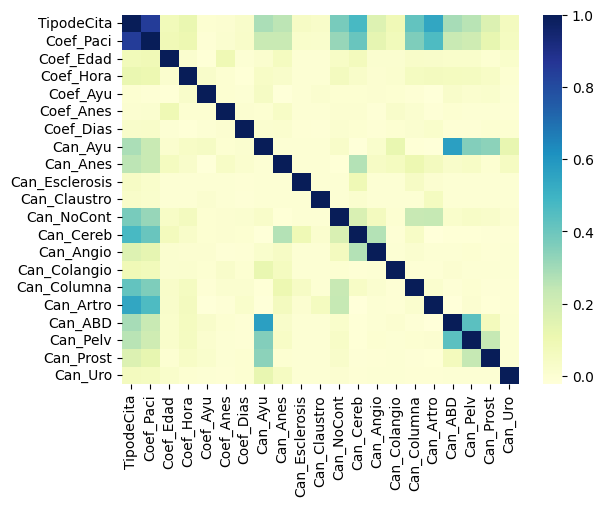

In [37]:
correlacion = DataTrain.corr()
sns.heatmap(correlacion, cmap='YlGnBu', annot=False)
plt.show()

In [38]:
data = DataTrain.drop("TipodeCita", axis = 1)

target = DataTrain["TipodeCita"]
target.dtypes

dtype('float64')

In [39]:
#Importamos los paquetes de sobremuestreo
from imblearn.over_sampling import SMOTE

#SMOTE
smote = SMOTE()

#Generación de nuevas muestras sintéticas
dataSmote, targetSmote = smote.fit_resample(data,target)

#Representación
balprob = targetSmote.value_counts()
print(balprob)

1.0    23713
0.0    23713
Name: TipodeCita, dtype: int64


In [40]:

#Importamos los paquetes
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
dataTrain, dataTest, targetTrain, targetTest = train_test_split(dataSmote,targetSmote, random_state = 0)

#Inicialización.
modelDTS = RandomForestClassifier()

#Entrenamiento
modelDTS.fit(dataTrain, targetTrain)

#Predicción 
targetPredDTS = modelDTS.predict(dataTest)
#Importamos el paquete de la búsqueda Grid
from sklearn.model_selection import GridSearchCV

#Declaramos las variables que van a hiperparametrizarse
param_grid = [{'criterion': ['gini','entropy'],
              'max_depth': [None, 50, 100, 200, 500],
              'min_samples_split': [2,3,4]}]

#Inicializamos la búsqueda grid
grid = GridSearchCV(modelDTS, param_grid, cv = 5, n_jobs = -1, scoring = 'precision')

#Entrenamos con los datos de entreno...
grid.fit(dataTrain,targetTrain)

#Pintamos los resultados:
print("Mejores parámetros: ")
print(grid.best_params_)
print()
print("Puntuaciones: ")
print(grid.cv_results_['mean_test_score'])

Mejores parámetros: 
{'criterion': 'entropy', 'max_depth': 200, 'min_samples_split': 4}

Puntuaciones: 
[0.9958699  0.99592618 0.99564494 0.99598348 0.99480033 0.99558914
 0.99587051 0.99569957 0.99547423 0.99581484 0.99541835 0.99581256
 0.99570024 0.99536147 0.99586974 0.99694068 0.99744904 0.99733603
 0.99716656 0.9970532  0.9972787  0.99744984 0.99722301 0.99750476
 0.99722185 0.99733449 0.9976738  0.99744863 0.99756178 0.99710978]


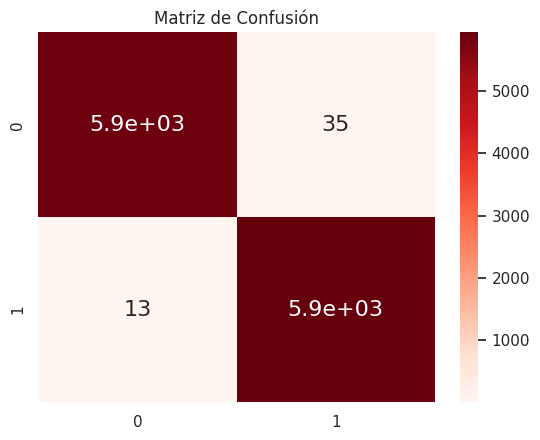

In [41]:

targetPredGrid = grid.predict(dataTest)


#Obtención de la matriz
arrayDTS = confusion_matrix(targetPredDTS, targetTest)
arrayGrid = confusion_matrix(targetPredGrid, targetTest)
df_cmDTS = pd.DataFrame(arrayDTS)
df_cmGrid = pd.DataFrame(arrayGrid)

#Representación de la matriz de confusión
sns.set(font_scale=1)
plt.title('Matriz de Confusión')
plt.show(sns.heatmap(df_cmGrid, annot=True, annot_kws={"size": 16}, cmap = 'Reds'))

In [42]:
print(classification_report(targetTest,targetPredDTS))


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5879
         1.0       1.00      0.99      0.99      5978

    accuracy                           0.99     11857
   macro avg       0.99      0.99      0.99     11857
weighted avg       0.99      0.99      0.99     11857



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def matrizConfusion(clasesReales, clasesPredichas, titulo):
  matriz = confusion_matrix(clasesReales, clasesPredichas)
  accuracy = accuracy_score(clasesReales, clasesPredichas)

  #grafico de matriz de confusion
  plt.figure(figsize=(4,4))
  matriz = pd.DataFrame(matriz,
                        columns = ["0 : Asistidos","1 : Cancelados"])
  plt.matshow(matriz, cmap = "summer", vmin = 0, vmax=3000, fignum = 1)
  plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
  plt.yticks(range(len(matriz.columns)), matriz.columns, rotation=45)
  etiquetas = (("Verdaderos/N", "Falsos/P"),
               ("Falsos/N", "Verdaderos/P"))
  plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
  plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
  for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
      plt.text(i,j + 0.14, str(matriz.iloc[i, j]),
               fontsize = 30, ha="center",va="center")
      plt.text(i,j - 0.25, etiquetas[i][j],
               fontsize = 11.5, ha="center",va="center")
  plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

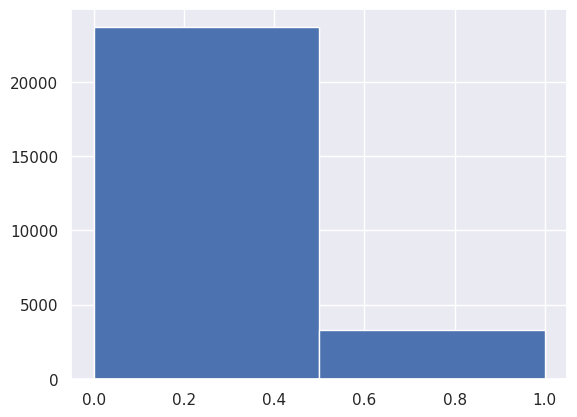

In [44]:
datos = DataTrain.drop("TipodeCita", axis=1).values
#datos = datos.T
datos.shape
clase = DataTrain["TipodeCita"].values
#clase.shape
#datos, clase
plt.hist(clase, bins=2)
plt.show

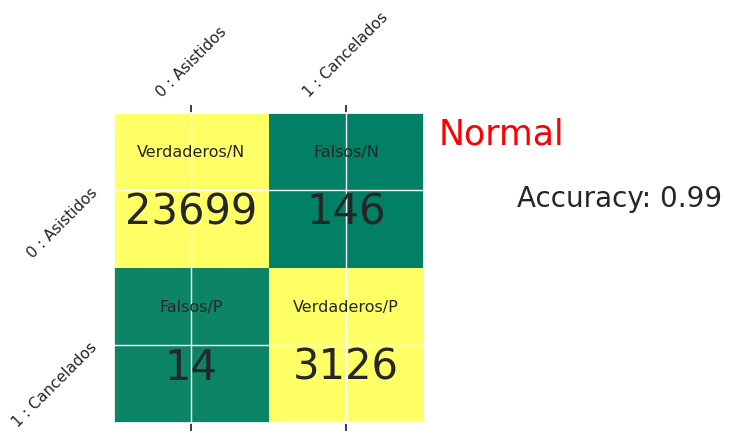

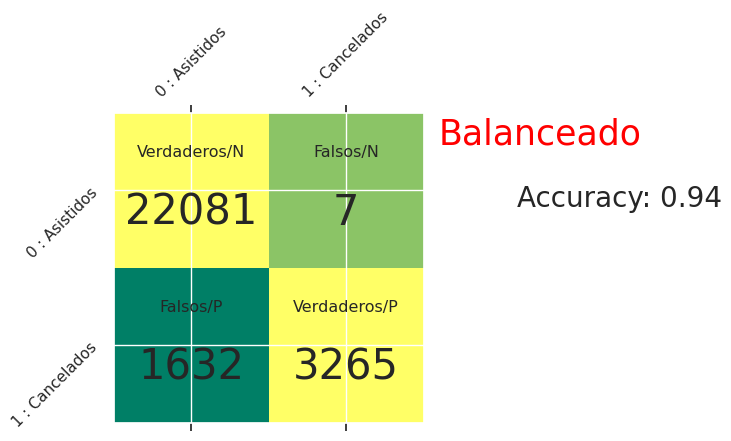

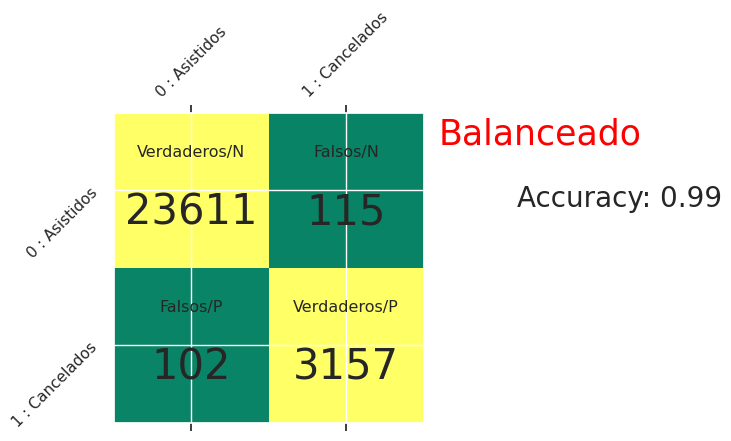

In [45]:
#Uso de modelo de regresion logistica asignando pesos a las clases
model = LogisticRegression().fit(datos, clase)
matrizConfusion(clase, model.predict(datos), "Normal")

model = LogisticRegression(class_weight={0 : 1, 1 : 100}).fit(datos, clase)
matrizConfusion(clase, model.predict(datos), "Balanceado")

model = LogisticRegression(class_weight="balanced").fit(datos, clase)
matrizConfusion(clase, model.predict(datos), "Balanceado")